In [1]:
import torch
import torch.nn as nn
from fastai import metrics

In [2]:
from sklearn.metrics import roc_auc_score

In [3]:
import pandas as pd

In [4]:
trn_df = pd.read_csv('train.csv',index_col='ID_code')

In [5]:
trn_df.head(2)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [6]:
tst_df = pd.read_csv('test.csv',index_col='ID_code')

In [7]:
tst_df.head(2)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


In [8]:
from fastai.tabular import *

In [9]:
from fastai.metrics import Precision,Recall,accuracy

In [10]:
trn_ = trn_df[:10000]

In [11]:
valid_ids_ = range(len(trn_)-1500,len(trn_))

In [12]:
valid_ids = range(len(trn_df)-50000,len(trn_df))

In [13]:
data = TabularDataBunch.from_df('.',trn_df,dep_var='target',valid_idx=valid_ids,test_df=tst_df,bs=128)

In [22]:
learn = tabular_learner(data,[1200,900,100],metrics=accuracy)

In [34]:
#learn.data

In [21]:
data.train_ds.x

TabularList (150000 items)
var_186 11.8411; var_143 11.2663; var_66 5.8056; var_113 -0.4851; var_133 6.5674; var_50 12.9194; var_171 -8.4254; var_16 5.7487; var_117 15.5752; var_75 18.3816; var_160 15.4576; var_118 -13.4221; var_198 12.7803; var_34 11.1920; var_68 5.0109; var_86 9.3225; var_99 -3.4132; var_169 5.4879; var_58 2.0183; var_95 0.1812; var_137 31.4045; var_35 10.5785; var_164 6.6760; var_136 29.4547; var_59 10.1166; var_100 9.4763; var_119 7.2739; var_5 -9.2834; var_33 16.8911; var_102 26.5376; var_175 7.7423; var_105 6.0454; var_195 -2.3978; var_71 0.5663; var_14 8.7989; var_49 5.3253; var_26 -5.1488; var_3 5.0930; var_22 2.5791; var_141 -5.6011; var_23 2.4716; var_149 17.9244; var_155 1.6573; var_156 12.1749; var_181 9.0164; var_193 1.6910; var_41 7.3746; var_69 -4.7010; var_24 14.3831; var_199 -1.0914; var_167 -0.6975; var_126 13.8571; var_83 2.9423; var_142 19.0614; var_55 14.8322; var_151 10.7800; var_139 15.6599; var_20 10.5350; var_57 5.3822; var_154 10.4838; var_39 

In [23]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=200, out_features=1200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=1200, out_features=900, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=900, out_features=100, bias=True)
    (7): ReLU(inplace)
    (8): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [27]:
a = next(iter(learn.data.train_dl));
a

[[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'),
  tensor([[ 5.2891, 13.3943,  4.0265,  ..., 10.8565, -0.8563, -0.2314],
          [ 7.0841,  8.9184,  5.6231,  ..., 10.8518,  6.0399,  1.0168],
          [ 7.9202,  8.5975,  7.6564,  ..., -0.3883,  5.3641, -3.3149],
          ...,
          [ 4.4135, 13.8458,  4.6268,  ..., 11.9617,  4.6435,  0.6971],
          [ 2.2129, 17.6559,  4.3256,  ...,  4.3383, -4.8719, -1.5139],
          [10.0674,  9.4703,  7.1894,  ..., 12.9177,  1.2921, -1.1694]],
         device='cuda:0')],
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [30]:
a[0][0][0]

tensor(0, device='cuda:0')

In [106]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


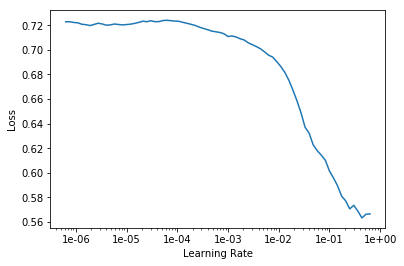

In [107]:
learn.recorder.plot()

In [22]:
#def roc_():
    

In [108]:
learn.fit_one_cycle(10,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.251410,1.034673,0.905660,00:08
1,0.248891,22411.570312,0.908060,00:08
2,0.247657,2332.593262,0.910280,00:08
3,0.247281,180086.515625,0.909860,00:08
4,0.245229,303995.968750,0.896960,00:08
5,0.251690,24940.027344,0.910060,00:08
6,0.227063,5202.736816,0.907520,00:08
7,0.231451,12188.568359,0.910720,00:08
8,0.231680,8976.296875,0.911740,00:08
9,0.217479,9799.837891,0.911400,00:08


In [19]:
learn.save('first_nn_100ep',return_path=True)

PosixPath('models/first_nn_100ep.pth')

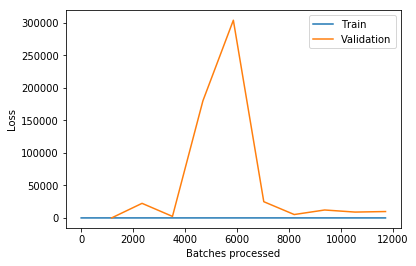

In [109]:
learn.recorder.plot_losses()

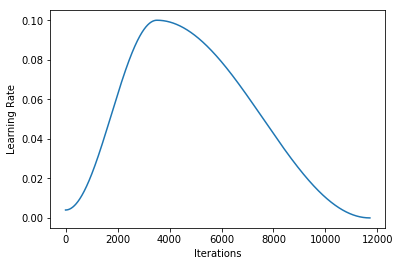

In [110]:
learn.recorder.plot_lr()

In [60]:
#learn.load('first_nn_100ep')

In [111]:
preds = learn.get_preds(DatasetType.Valid)

In [116]:
preds[0]

tensor([[0.7903, 0.2097],
        [0.9857, 0.0143],
        [0.9869, 0.0131],
        ...,
        [0.9503, 0.0497],
        [0.9644, 0.0356],
        [0.9963, 0.0037]])

In [112]:
preds[1].cpu().numpy()

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

In [113]:
roc_auc_score(trn_df.iloc[len(trn_df)-50000:].target.values,preds[1].cpu().numpy())

1.0

In [114]:
_ = trn_df.iloc[len(trn_df)-50000:].target.values == preds[1].cpu().numpy()

In [115]:
_.mean()

1.0

In [64]:
v = preds[1].cpu().numpy()

In [66]:
(v == 1).sum()

3024

In [48]:
preds_sub = learn.get_preds(DatasetType.Test)

In [50]:
preds_sub[1].

tensor([0, 0, 0,  ..., 0, 0, 0])

In [51]:
ss = pd.read_csv('sample_submission.csv',index_col='ID_code')

In [53]:
ss.head(2)

,target
ID_code,
test_0,0
test_1,0


In [54]:
ss.target = preds_sub[1].cpu().numpy()

In [55]:
ss.head(2)

,target
ID_code,
test_0,0
test_1,0


In [56]:
ss.to_csv('nn_100ep.csv')

In [57]:
sol = pd.read_csv('nn_100ep.csv',index_col = 'ID_code')

In [58]:
sol.head(2)

,target
ID_code,
test_0,0
test_1,0


In [59]:
!kaggle c submit santander-customer-transaction-prediction -f nn_100ep.csv -m "100ep nn"

100%|███████████████████████████████████████| 2.56M/2.56M [00:11<00:00, 241kB/s]
Successfully submitted to Santander Customer Transaction Prediction